In [7]:
# importera dependences 
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns

# filepath
file_path = "../Datasets/cars.csv"

# hämta datasetet.
df_cars = pd.read_csv(file_path)

Frågesällning 1)

- Hur påverkar vikten och antalet cylindrar bränsleförbrukningen bland bilarna?

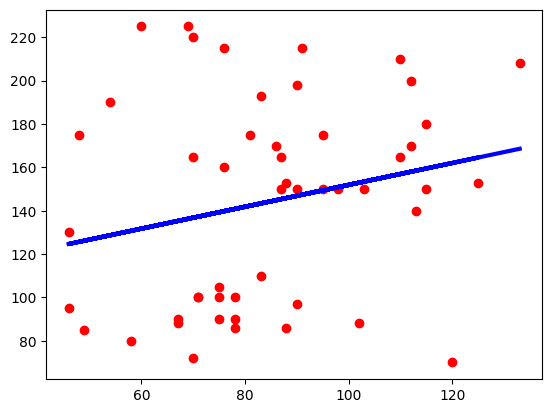

In [18]:
from sklearn.linear_model import LinearRegression

df_cars.dropna(inplace=True)

x = df_cars[df_cars["origin"] == "europe"][["horsepower"]].head(50).values
y = df_cars[df_cars["origin"] == "usa"]["horsepower"].head(50).values

#vi börjar att kolla om det finns någon linear regresion mellan cylinder och weight
#plt.scatter(df_cars["cylinders"], df_cars["weight"], color="red")

regr = LinearRegression()
regr.fit(x, y)

regr_pred = regr.predict(x)

plt.scatter(x, y, color="red")
plt.plot(x, regr_pred, color="blue", linewidth=3)
plt.show()


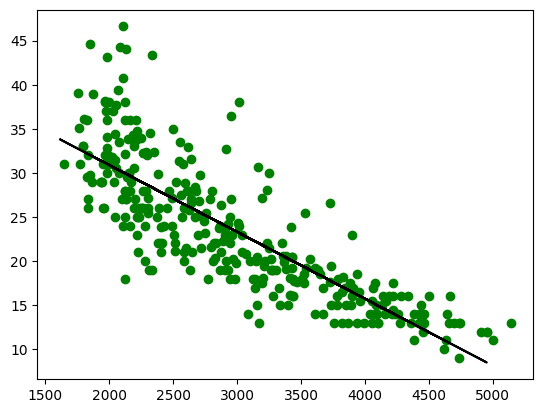

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

regr = LinearRegression()

weight_x = df_cars[["weight"]].values
y = df_cars["mpg"].values

we_train, we_test, y_train, y_test = train_test_split(weight_x, y, test_size=0.2, random_state=0) 

we_regr = regr.fit(we_train, y_train)
we_pred = we_regr.predict(we_test)

plt.scatter(we_train, y_train,color='g') 
plt.plot(we_test, we_pred,color='k')


95% konfidensintervall för medelvikten hos bilar med årsmodellen 1980

In [ ]:
# Sorterar ut alla bilar med årsmodellen 1980 från datasetet.
df_model_80 = df_cars.loc[df_cars["model_year"] == 80]
# Dropar alla bilar med NaN (om de finns några).
df_model_80.dropna()
# skriver ut de fem första.
df_model_80.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
309,41.5,4,98.0,76.0,2144,14.7,80,europe,vw rabbit
310,38.1,4,89.0,60.0,1968,18.8,80,japan,toyota corolla tercel
311,32.1,4,98.0,70.0,2120,15.5,80,usa,chevrolet chevette
312,37.2,4,86.0,65.0,2019,16.4,80,japan,datsun 310
313,28.0,4,151.0,90.0,2678,16.5,80,usa,chevrolet citation


In [ ]:
mean = np.mean(df_model_80["mpg"]) # beräknar medelvikten bland bilarna i stickprovet.
std = np.std(df_model_80["mpg"], ddof=1) # beräknar standardavvikelse för stickprovet.
n = len(df_model_80["mpg"]) # n längden på stickprovet.
a = ((1 - 0.95) / 2) # beräknar alpha.

# skriver ut parametrarna .
print(mean, std, n, a) 

33.69655172413793 7.037982805495004 29 0.025000000000000022


In [ ]:
from scipy.stats import t as t_dis # import t-fördelningen.

t_crit = t_dis.ppf(a, n - 1) # det kritiska t-värde.
sem = std / np.sqrt(n) # medelvärdesstandardfel.

# under och övre gränsen 
upper = mean - t_crit * sem 
lower = mean + t_crit * sem

# skriver ut övre och undre gränsen. 
print(f"upper: {round(upper, 2)}, lower: {round(lower, 2)}")

upper: 36.37, lower: 31.02


<h3>Hypotestest för att undersöka om mängden hästkrafter i amerikanska bilar skiljer sig från de europeisk bilarna. </h3>
<p> med en signifikansnivå på 0.05. </p>

In [ ]:
usa_cars = df_cars.loc[df_cars["origin"] == "usa"]
eu_cars = df_cars.loc[df_cars["origin"] == "europe"]

horsepower_usa = usa_cars["horsepower"].dropna()
horsepower_eu = eu_cars["horsepower"].dropna()

# beräkna mean för de olika områdena.
mean_usa = np.mean(horsepower_usa)
mean_eu = np.mean(horsepower_eu)

print(f"(mean) USA: {round(mean_usa, 1)}, EU: {round(mean_eu, 1)}")

(mean) USA: 119.0, EU: 80.6


In [ ]:
from scipy.stats import t

std = usa_cars["horsepower"].std(ddof=1)
n = len(usa_cars["horsepower"])

statistic = (mean_usa - mean_eu) / (std / np.sqrt(n))
print(f"statistic: {statistic}")

p_value = 1 - t.cdf(x=statistic, df=n-1)
print(f"p_value: {2*p_value}")


statistic: 15.223008997989963
p_value: 0.0


In [ ]:
from scipy.stats import ttest_ind

result = ttest_ind(a=horsepower_usa, b=horsepower_eu, equal_var=False, alternative='two-sided')
print(result)

Ttest_indResult(statistic=10.898495750260025, pvalue=2.1065705369888018e-22)


# Statistik Raport
---

### Vi ska i raporten undersöka om mängden hästkrafter i amerikanska bilar skiljer sig från de europeisk bilarna.

**Vi börjar med att räkna ut medel mängden för hästkrafter för amerikanska och europeiska bilar.**

**Deta gör vi igenom att först dela upp datasetet i amerikanska och europeiska bilar.**

**och sen med hjälp av numpy räkna ut medlvärdet av varje typ.**

In [ ]:
# sorterar datan på vart bilarna kommer ifrån.
usa_cars = df_cars.loc[df_cars["origin"] == "usa"]
eu_cars = df_cars.loc[df_cars["origin"] == "europe"]



In [ ]:
mu_data = {"x": ["USA", "EU"], "y": [mu_usa, mu_eu]}

# skapar subplots för att bygga ett grid.
fig = plt.figure(figsize=(16, 8), dpi=120, constrained_layout = True)
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[0, 1])
ax2 = fig.add_subplot(spec[1, 0])

sns.histplot(data=df_cars[df_cars["origin"] == "usa"], x="horsepower", bins=8, ax=ax0, multiple="dodge", color="red")
ax0.plot([mu_usa, mu_usa], [0, 80], color='red', linestyle='--', linewidth=2, label='Medelvärde')
ax0.set_title("Hästkrafter hos amerikanska bilar")
ax0.legend(loc='upper right')

sns.histplot(data=df_cars[df_cars["origin"] == "europe"], x="horsepower", bins=8, ax=ax1, color="blue")
ax1.plot([mu_eu, mu_eu], [0, 80], color='blue', linestyle='--', linewidth=2, label='Medelvärde')
ax1.set_title("Hästkrafter hos europeiska bilar")
ax1.legend(loc='upper right')

sns.barplot(data=mu_data, x="x", y="y", ax=ax2, width=0.3, palette=["red", "blue"], edgecolor="black", alpha=0.6)